In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2025-02-27 14:09:34.173354: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 14:09:34.180298: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 14:09:34.258188: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 14:09:34.337812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740644674.400772    1191 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740644674.41

In [3]:

datasets = tf.keras.datasets.cifar10

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = datasets.load_data()
X_train,y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid ,X_test = X_train /255. ,X_valid /255. ,X_test /255.

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
X_train[0].shape

(32, 32, 3)

In [15]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
def plot_sample(index):
    plt.figure(figsize=(8,4))
    plt.imshow(X_train[index])

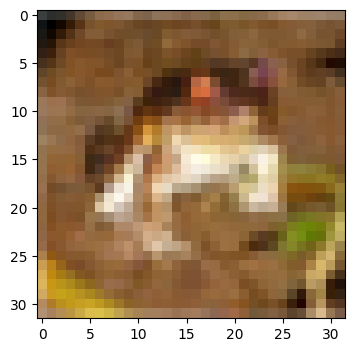

In [17]:
plot_sample(0)

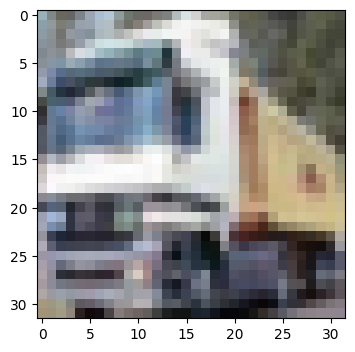

In [18]:
plot_sample(1)

In [19]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

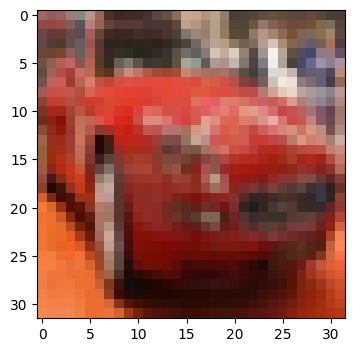

In [20]:
plot_sample(5)

In [21]:
classes[y_train[5][0]]

'automobile'

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [24]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(100, activation='swish', kernel_initializer="he_uniform"),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Early stooping to avoid  over fitting 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)


model.fit(X_train_scaled, y_train,batch_size = 100,epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1124 - loss: 2.2950
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2146 - loss: 2.1293
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2710 - loss: 1.9850
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3049 - loss: 1.8978
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3365 - loss: 1.8252
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3475 - loss: 1.7916
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3663 - loss: 1.7508
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3842 - loss: 1.7161
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3869 - loss: 1.6891
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4003 - loss: 1.6618


In [24]:
y_test[0]
classes[y_test[1][0]]

'ship'

In [25]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


'truck'

In [27]:
model.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4056 - loss: 1.6537


[1.6599955558776855, 0.4059000015258789]

### Accuracy Measurement Using Sklearn 

In [27]:
from sklearn.metrics import  accuracy_score

In [30]:
y_pred = model.predict(X_test_scaled)
y_pred_class = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.42

In [31]:
X_train_pred = model.predict(X_train_scaled)
y_train_pred = np.argmax(X_train_pred, axis=1)
accuracy_score(y_train, y_train_pred)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


0.42178

### Using Nadam Optimizer and early stopping for the same datasets

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train.shape

(45000, 32, 32, 3)

In [7]:
X_valid.shape

(5000, 32, 32, 3)

In [9]:
model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])



model_2.compile(optimizer='Nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Early stooping to avoid overfitting 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

history = model_2.fit(X_train, y_train, 
                    epochs=10, 
                    validation_data=(X_valid,y_valid),
                    callbacks=[early_stopping])




/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 79s 315ms/step - accuracy: 0.2548 - loss: 2.9239 - val_accuracy: 0.3348 - val_loss: 1.8219
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 81s 311ms/step - accuracy: 0.4003 - loss: 1.6720 - val_accuracy: 0.4428 - val_loss: 1.5858
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 79s 323ms/step - accuracy: 0.4459 - loss: 1.5626 - val_accuracy: 0.4688 - val_loss: 1.5295
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 80s 314ms/step - accuracy: 0.4744 - loss: 1.4838 - val_accuracy: 0.4568 - val_loss: 1.5245
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 76s 310ms/step - accuracy: 0.4876 - loss: 1.4371 - val_accuracy: 0.4882 - val_loss: 1.4536
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 81s 331ms/step - accuracy: 0.5019 - loss: 1.3906 - val_accuracy: 0.4958 - val_loss: 1.4147
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 84s 340ms/step - accuracy: 0.5233 - loss: 1.3402 - val_accuracy: 0.5144 - val_loss: 1.3822
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 79s 319ms/step - accuracy: 0.5426 - loss: 1

In [ ]:
plt.figure(figsize=(10,6))
plt.plot()

### adding batch normalization 

In [6]:
(X_train_full,y_train_full),(X_test,y_test) = datasets.load_data()
X_train,y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid ,X_test = X_train /255. ,X_valid /255. ,X_test /255.

In [7]:
model_3= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(optimizer='Nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Early stooping to avoid overfitting 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

history = model_3.fit(X_train, y_train, 
                    epochs=3,
                    batch_size=100,
                    validation_data=(X_valid,y_valid),
                    callbacks=[early_stopping])


/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 100s 218ms/step - accuracy: 0.3704 - loss: 1.9690 - val_accuracy: 0.4628 - val_loss: 1.5215
Epoch 2/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 237ms/step - accuracy: 0.4896 - loss: 1.4393 - val_accuracy: 0.4762 - val_loss: 1.4512
Epoch 3/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 139s 231ms/step - accuracy: 0.5391 - loss: 1.3118 - val_accuracy: 0.5316 - val_loss: 1.3412


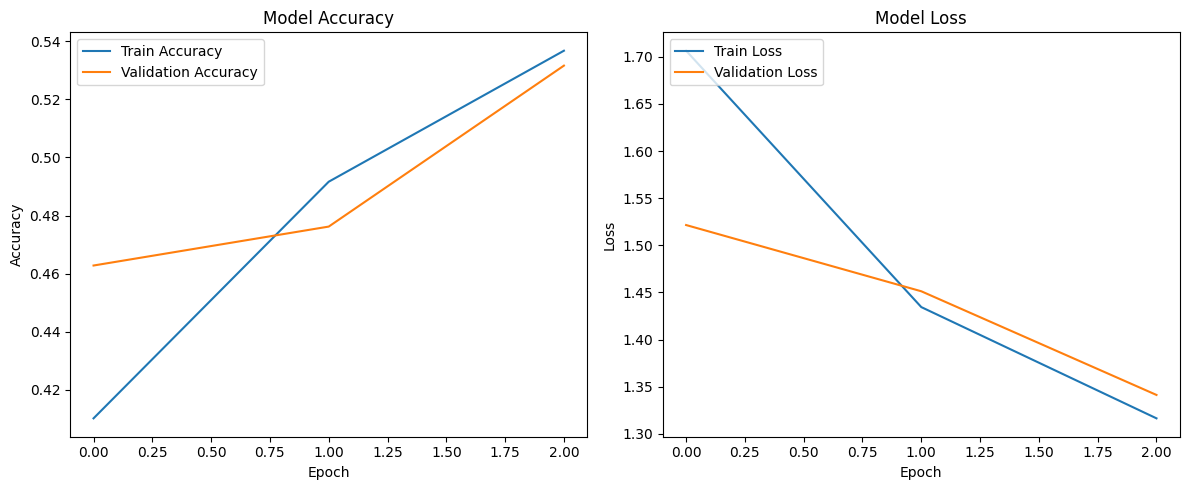

In [8]:
# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Replacing batch normilization with SELU

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-27 14:01:49.849591: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 88s 192ms/step - accuracy: 0.2307 - loss: 5.3630 - val_accuracy: 0.2536 - val_loss: 23.2122
Epoch 2/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 166s 247ms/step - accuracy: 0.3667 - loss: 1.7740 - val_accuracy: 0.2168 - val_loss: 35.9626
Epoch 3/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 129s 219ms/step - accuracy: 0.3996 - loss: 1.6657 - val_accuracy: 0.2188 - val_loss: 36.1602


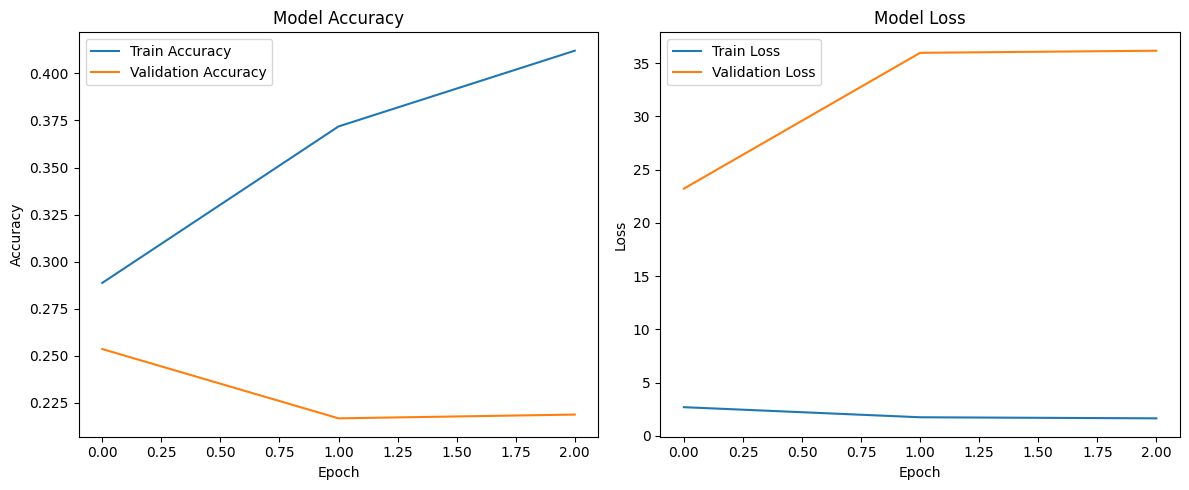

In [7]:
# Ensure input data is normalized to zero mean and unit variance
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_normalized = (X_train - mean) / std
X_valid_normalized = (X_valid - mean) / std
X_test_normalized = (X_test - mean) / std


model_4= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='selu',kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(1000, activation='selu',kernel_initializer='lecun_normal'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(optimizer='Nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Early stooping to avoid overfitting 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

history = model_4.fit(X_train, y_train, 
                    epochs=3,
                    batch_size=100,
                    validation_data=(X_valid_normalized,y_valid),
                    callbacks=[early_stopping])


# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Adding alpha dropout regularization

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-27 14:09:54.919991: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.3191 - loss: 3.7622 - val_accuracy: 0.4634 - val_loss: 1.6668
Epoch 2/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 99s 221ms/step - accuracy: 0.4714 - loss: 1.4886 - val_accuracy: 0.4754 - val_loss: 1.5804
Epoch 3/3
450/450 ━━━━━━━━━━━━━━━━━━━━ 99s 221ms/step - accuracy: 0.5123 - loss: 1.3700 - val_accuracy: 0.4956 - val_loss: 1.5800


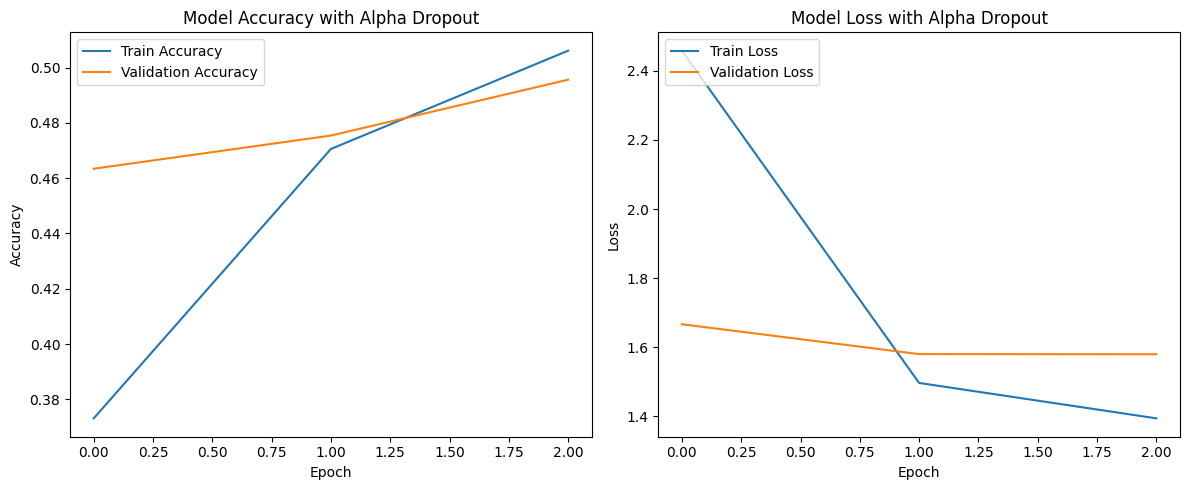

In [5]:
# Ensure input data is normalized to zero mean and unit variance
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_normalized = (X_train - mean) / std
X_valid_normalized = (X_valid - mean) / std
X_test_normalized = (X_test - mean) / std

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.1),  # Add Alpha Dropout layer
    tf.keras.layers.Dense(1000, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.1),  # Add Alpha Dropout layer
    tf.keras.layers.Dense(10, activation='softmax')
])

model_5.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True)

history = model_5.fit(X_train_normalized, y_train, 
                      epochs=3,
                      batch_size=100,
                      validation_data=(X_valid_normalized, y_valid),
                      callbacks=[early_stopping])


# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Alpha Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Alpha Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### adding 1cycle scheduling 

In [6]:
import tensorflow as tf
import tensorflow_addons as tfa


# Ensure input data is normalized to zero mean and unit variance
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_normalized = (X_train - mean) / std
X_valid_normalized = (X_valid - mean) / std
X_test_normalized = (X_test - mean) / std

# Define the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.1),
    tf.keras.layers.Dense(1000, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.AlphaDropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_6.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Define the 1cycle learning rate scheduler
one_cycle_lr = tfa.optimizers.OneCycleLR(
    max_lr=0.01,  # Maximum learning rate
    epochs=3,
    steps_per_epoch=np.ceil(len(X_train_normalized) / 100),  # Assuming batch size of 100
    pct_start=0.3,  # Percentage of the cycle spent increasing the learning rate
    anneal_strategy='linear'  # Annealing strategy
)

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True)

# Train the model with 1cycle scheduling
history = model_6.fit(X_train_normalized, y_train, 
                      epochs=3,
                      batch_size=100,
                      validation_data=(X_valid_normalized, y_valid),
                      callbacks=[early_stopping, one_cycle_lr])

# Plotting the learning curves
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with 1cycle Scheduling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with 1cycle Scheduling')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'tensorflow_addons'